In this tutorial our goal is to predict the forest cover type. This can be achieved by analysing the dataset provided. We will be using pandas library to help with determining the main factors that are correlated with forest cover type.

In [1]:
 
import zipfile
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from collections import Counter
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print ("Setup Complete")

/kaggle/input/forest-cover-type-kernels-only/test.csv.zip
/kaggle/input/forest-cover-type-kernels-only/sampleSubmission.csv.zip
/kaggle/input/forest-cover-type-kernels-only/train.csv.zip
/kaggle/input/forest-cover-type-kernels-only/sample_submission.csv.zip
Setup Complete


In [2]:
# Path of the file to read
train_filepath = 'kaggle/input/Forest/train.csv'
test_filepath = 'kaggle/input/Forest/train.csv'


import zipfile
zf = zipfile.ZipFile('/kaggle/input/forest-cover-type-kernels-only/train.csv.zip')
zf1 = zipfile.ZipFile('/kaggle/input/forest-cover-type-kernels-only/test.csv.zip')
train= pd.read_csv(zf.open('train.csv'),index_col=0)
test = pd.read_csv(zf1.open('test.csv'),index_col=0)

#  Data Exploration and Feature Engineering

First it might be useful to get an idea of the size of dataset available.
As shown, our train dataFrame has around 15000 records split across 56 different columns. 
We will also examine the cells by printing the first 5 rows.

In [3]:
print("The number of traning examples(data points) = %i " % train.shape[0])
print("The number of features we have = %i " % train.shape[1])

The number of traning examples(data points) = 15120 
The number of features we have = 55 


In [4]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


It seems that the cover type is assigned a value. We can determine the range of values that the cover type can take. We will figure that the values range between 1 and 7.

In [5]:
Distinct_Val_in_CoverType= train.Cover_Type.unique()

In [6]:
print("Minimum_Number_Assigned:",train['Cover_Type'].min(), "Maximum_Number_Assigned:",train['Cover_Type'].max())

Minimum_Number_Assigned: 1 Maximum_Number_Assigned: 7


Now we can check the count of each element in Cover_Type column.

In [7]:
train.Cover_Type.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

The results above may indicate that each Cover Type has equal chance, however further examination is needed.

Perhaps examining other columns might assist in finding a pattern.

In [8]:
train.describe(include = 'all')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:

col_uni_val={}
for i in train.columns:
    col_uni_val[i] = len(train[i].unique())

import pprint
pprint.pprint(col_uni_val)

{'Aspect': 361,
 'Cover_Type': 7,
 'Elevation': 1665,
 'Hillshade_3pm': 247,
 'Hillshade_9am': 176,
 'Hillshade_Noon': 141,
 'Horizontal_Distance_To_Fire_Points': 2710,
 'Horizontal_Distance_To_Hydrology': 400,
 'Horizontal_Distance_To_Roadways': 3250,
 'Slope': 52,
 'Soil_Type1': 2,
 'Soil_Type10': 2,
 'Soil_Type11': 2,
 'Soil_Type12': 2,
 'Soil_Type13': 2,
 'Soil_Type14': 2,
 'Soil_Type15': 1,
 'Soil_Type16': 2,
 'Soil_Type17': 2,
 'Soil_Type18': 2,
 'Soil_Type19': 2,
 'Soil_Type2': 2,
 'Soil_Type20': 2,
 'Soil_Type21': 2,
 'Soil_Type22': 2,
 'Soil_Type23': 2,
 'Soil_Type24': 2,
 'Soil_Type25': 2,
 'Soil_Type26': 2,
 'Soil_Type27': 2,
 'Soil_Type28': 2,
 'Soil_Type29': 2,
 'Soil_Type3': 2,
 'Soil_Type30': 2,
 'Soil_Type31': 2,
 'Soil_Type32': 2,
 'Soil_Type33': 2,
 'Soil_Type34': 2,
 'Soil_Type35': 2,
 'Soil_Type36': 2,
 'Soil_Type37': 2,
 'Soil_Type38': 2,
 'Soil_Type39': 2,
 'Soil_Type4': 2,
 'Soil_Type40': 2,
 'Soil_Type5': 2,
 'Soil_Type6': 2,
 'Soil_Type7': 1,
 'Soil_Type8': 2,


As we can see, it seems that all Soil Type columns can take up to two values only. This might be a sign that the type of soil is of boolean type, either 'yes' or 'no'. Further investigation is needed here to determine whether a forest can be of several types and whether a certain combination of soil types can affect Forest Cover Type.

Another important factor to check for is whether there are any null values. Null values need to be filled with other reasonable of values or removed if they are very few.

In [10]:
train.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Alright, so there are no null values!

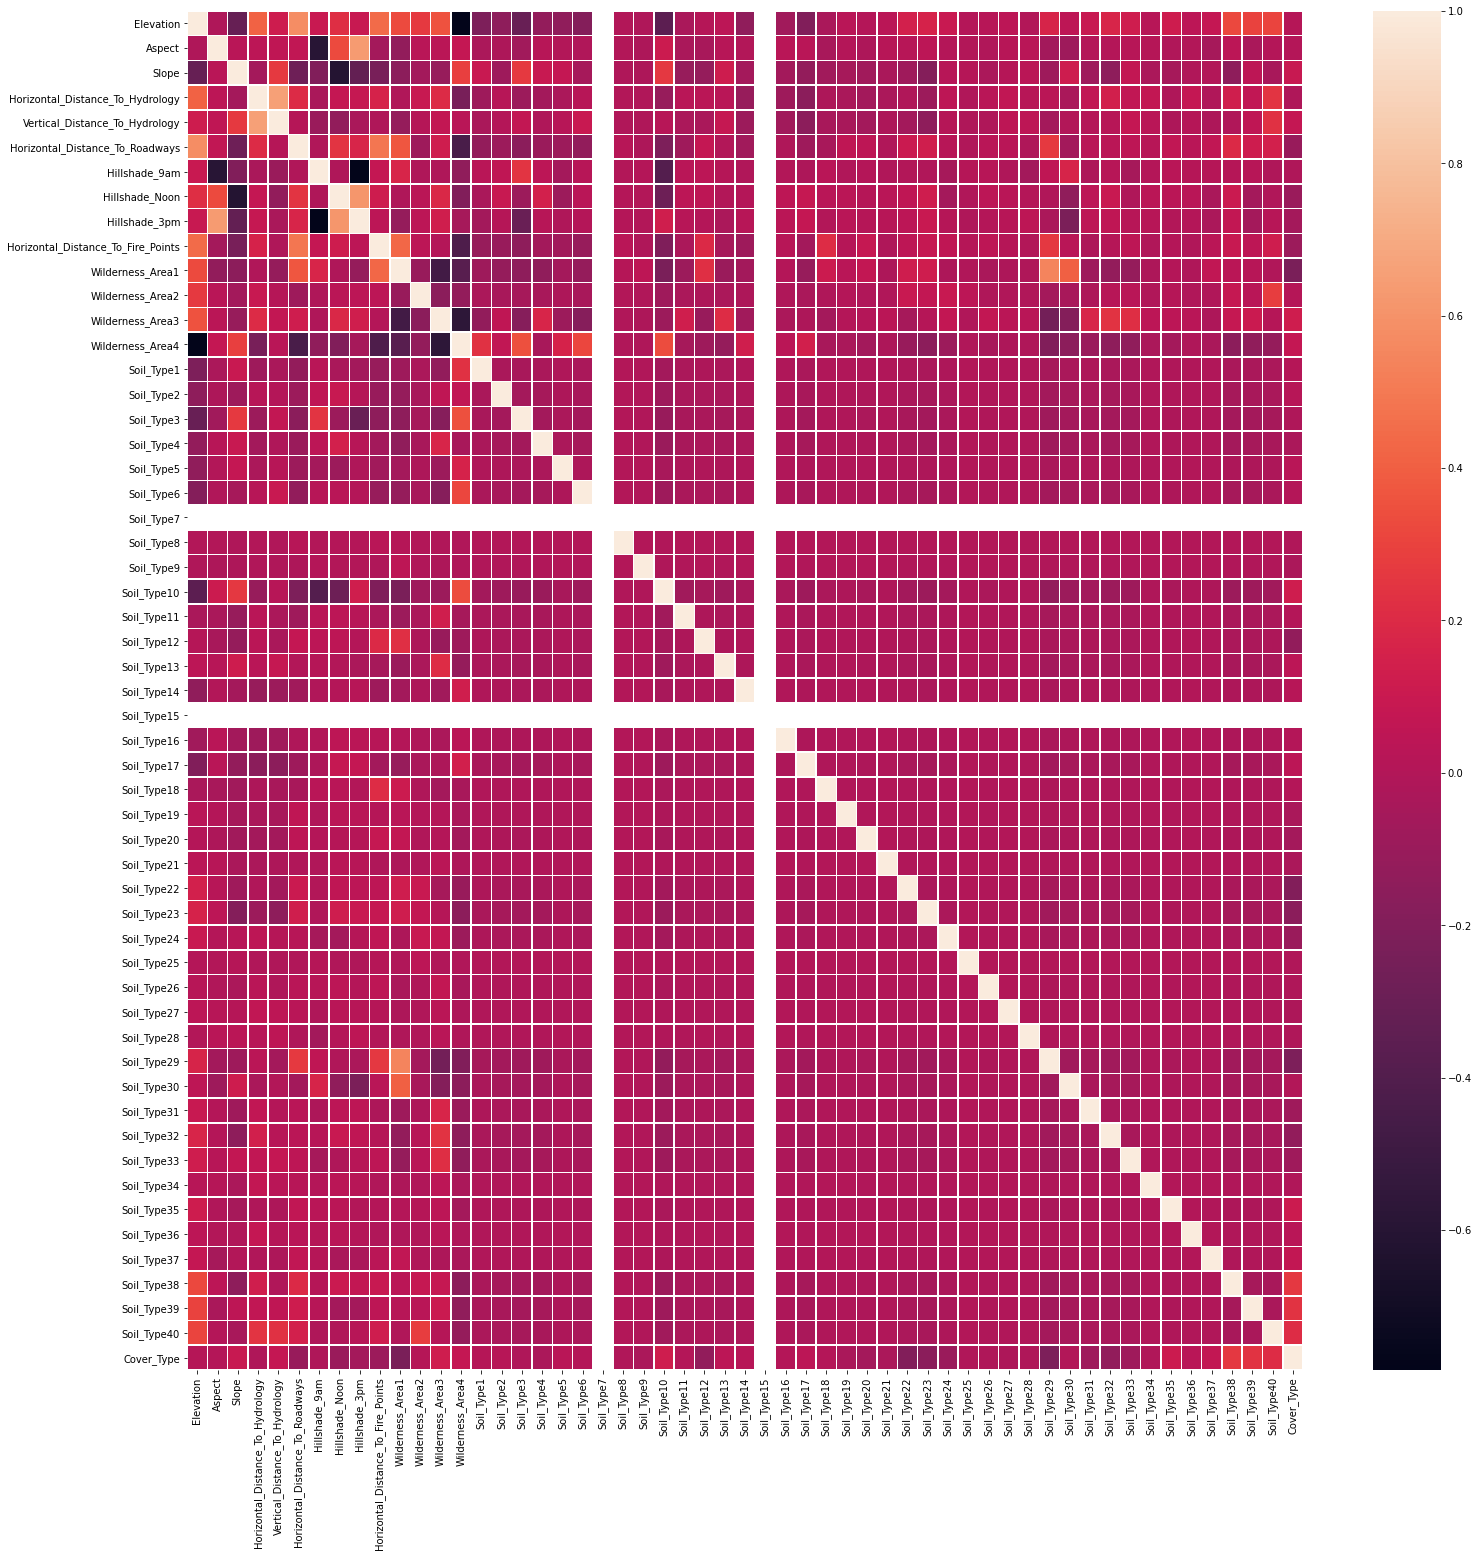

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train.corr()
f, ax = plt.subplots(figsize=(25, 25))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,linewidths=.5)

This is an overview of the correlation values between all the features available in the data set. Our main focus is on the column 'Cover Type' as we need to determine which features have the greatest effect on the Cover Type.

I will start with the Soil_Type columns in the data set and see if it is possible to deduce any strong relationship between the 'Cover_Type' and some Soil Types.

Obviously, Soil_Type7 and Soil_Type15 do not seem to have any effect on the Cover_Type(no correlation). 
Soil_Type38 and Soil_Type39 have the largest +ve correlation, while Soil_Type22 and Soil_Type29 have the lowest -ve correlation between Cover Type.
However, we need to check the actual correlation values to avoid making wrong assumptions.

In [12]:

Soil_Type_Corr= corr.loc[corr.index[14:54], 'Cover_Type']
print( Soil_Type_Corr)

Soil_Type1     0.015069
Soil_Type2     0.022627
Soil_Type3    -0.016393
Soil_Type4    -0.027816
Soil_Type5     0.027692
Soil_Type6     0.006521
Soil_Type7          NaN
Soil_Type8    -0.008133
Soil_Type9    -0.027012
Soil_Type10    0.128972
Soil_Type11    0.010228
Soil_Type12   -0.129985
Soil_Type13    0.040528
Soil_Type14    0.022019
Soil_Type15         NaN
Soil_Type16    0.008793
Soil_Type17    0.042453
Soil_Type18    0.006312
Soil_Type19   -0.031824
Soil_Type20   -0.053013
Soil_Type21   -0.024410
Soil_Type22   -0.195993
Soil_Type23   -0.158762
Soil_Type24   -0.100797
Soil_Type25   -0.008133
Soil_Type26   -0.017184
Soil_Type27   -0.023109
Soil_Type28   -0.012202
Soil_Type29   -0.218564
Soil_Type30    0.001393
Soil_Type31   -0.079882
Soil_Type32   -0.132312
Soil_Type33   -0.078955
Soil_Type34   -0.003470
Soil_Type35    0.114327
Soil_Type36    0.025726
Soil_Type37    0.071210
Soil_Type38    0.257810
Soil_Type39    0.240384
Soil_Type40    0.205851
Name: Cover_Type, dtype: float64


In [13]:
print("The above values proved that Soil_Type7 and Soil_Type15 have NaN values (null)")
print(Soil_Type_Corr.idxmax(),"has the maximum positive correlation value of ",Soil_Type_Corr.max())
print(Soil_Type_Corr.idxmin(),"has the maximum positive correlation value of ",Soil_Type_Corr.min())

The above values proved that Soil_Type7 and Soil_Type15 have NaN values (null)
Soil_Type38 has the maximum positive correlation value of  0.2578101883710901
Soil_Type29 has the maximum positive correlation value of  -0.21856387927405405


Removing the columns for Soil_Type7 and Soil_Type15 would be the best way to deal with them in order to eliminate unuseful data. As for the correlation values of Soil_Type38 and Soil_Type29, the values are small (might not be very significant ) but we might need them later on for further exploration.

In [14]:
 train.drop(["Soil_Type7", "Soil_Type15"], axis = 1, inplace = True)

After having finished analysing the direct relationship between Soil Type and Cover Type, we can move on to the other features.
According to the overview graph shown earlier, there isn't a strong correlation between one specific feature of the remaining features (Soil type not included) and Cover Type, hence it might be wise to check whether there is a correlation between the remaining features with each other and see if we can remove some features completely or remove some features but replace them with a new feature that combines several features together to improve the performance of the model.

Our focus this time will be on distances: Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, and Horizontal_Distance_To_Fire_points.

First, I will check the relation between Horizontal_Distance_To_Hydrology and the remaining distances.

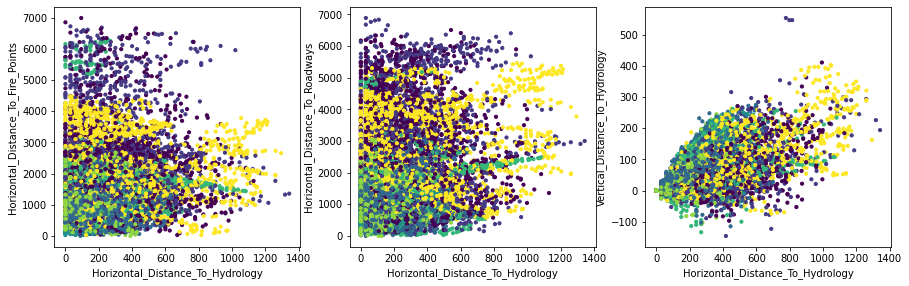

In [15]:
import matplotlib.pyplot as plt
classes = np.array(list(train.Cover_Type.values))

def plotRelation(first_feature, sec_feature):

    plt.scatter(first_feature, sec_feature, c = classes, s=10)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(15,15))
f.add_subplot(331)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Fire_Points)
f.add_subplot(332)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Roadways)
f.add_subplot(333)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

It seems that there is a positive correlation between Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology. It might be useful to note that Vertical Distance has some negative values, hence taking the absolute of this column might give better results.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



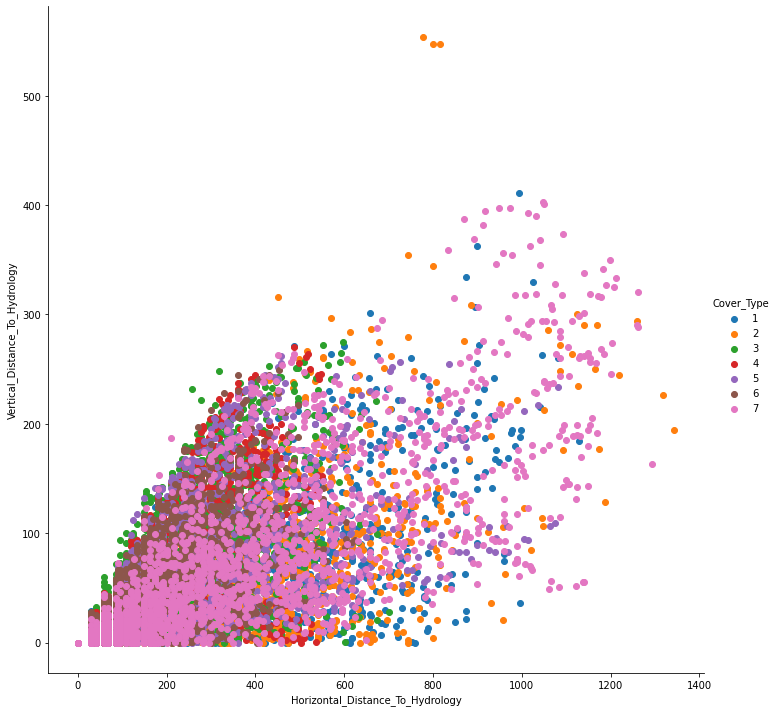

In [16]:
train["Vertical_Distance_To_Hydrology"] = abs(train['Vertical_Distance_To_Hydrology'])

sns.FacetGrid(train, hue="Cover_Type", size=10).map(plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()

We can still see that there is some correlation between the two variables/ features.

In [17]:
print("The correlation value between Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology is ",corr.loc['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology'])

The correlation value between Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology is  0.6521424712357364


Now we'll do the same for the other distance features to finish comparing all of the distance features together.

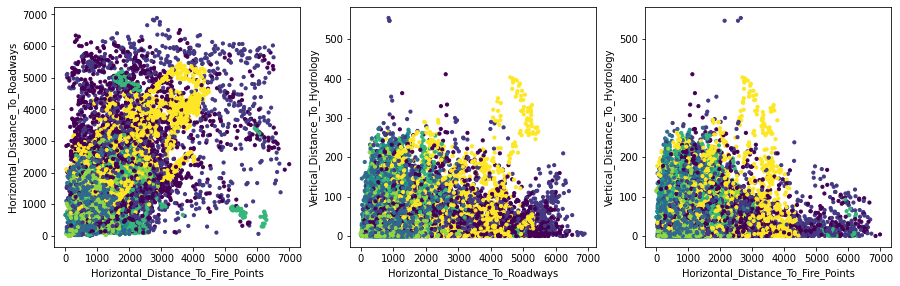

In [18]:
f = plt.figure(figsize=(15,15))
f.add_subplot(331)
plotRelation( train.Horizontal_Distance_To_Fire_Points,train.Horizontal_Distance_To_Roadways)
f.add_subplot(333)
plotRelation(train.Horizontal_Distance_To_Fire_Points,train.Vertical_Distance_To_Hydrology )
f.add_subplot(332)
plotRelation( train.Horizontal_Distance_To_Roadways,train.Vertical_Distance_To_Hydrology)

It seems that the only significant correlation was between Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology, so we can drop one of them.

The next step would be to search for outliers; this is best done through boxplots.

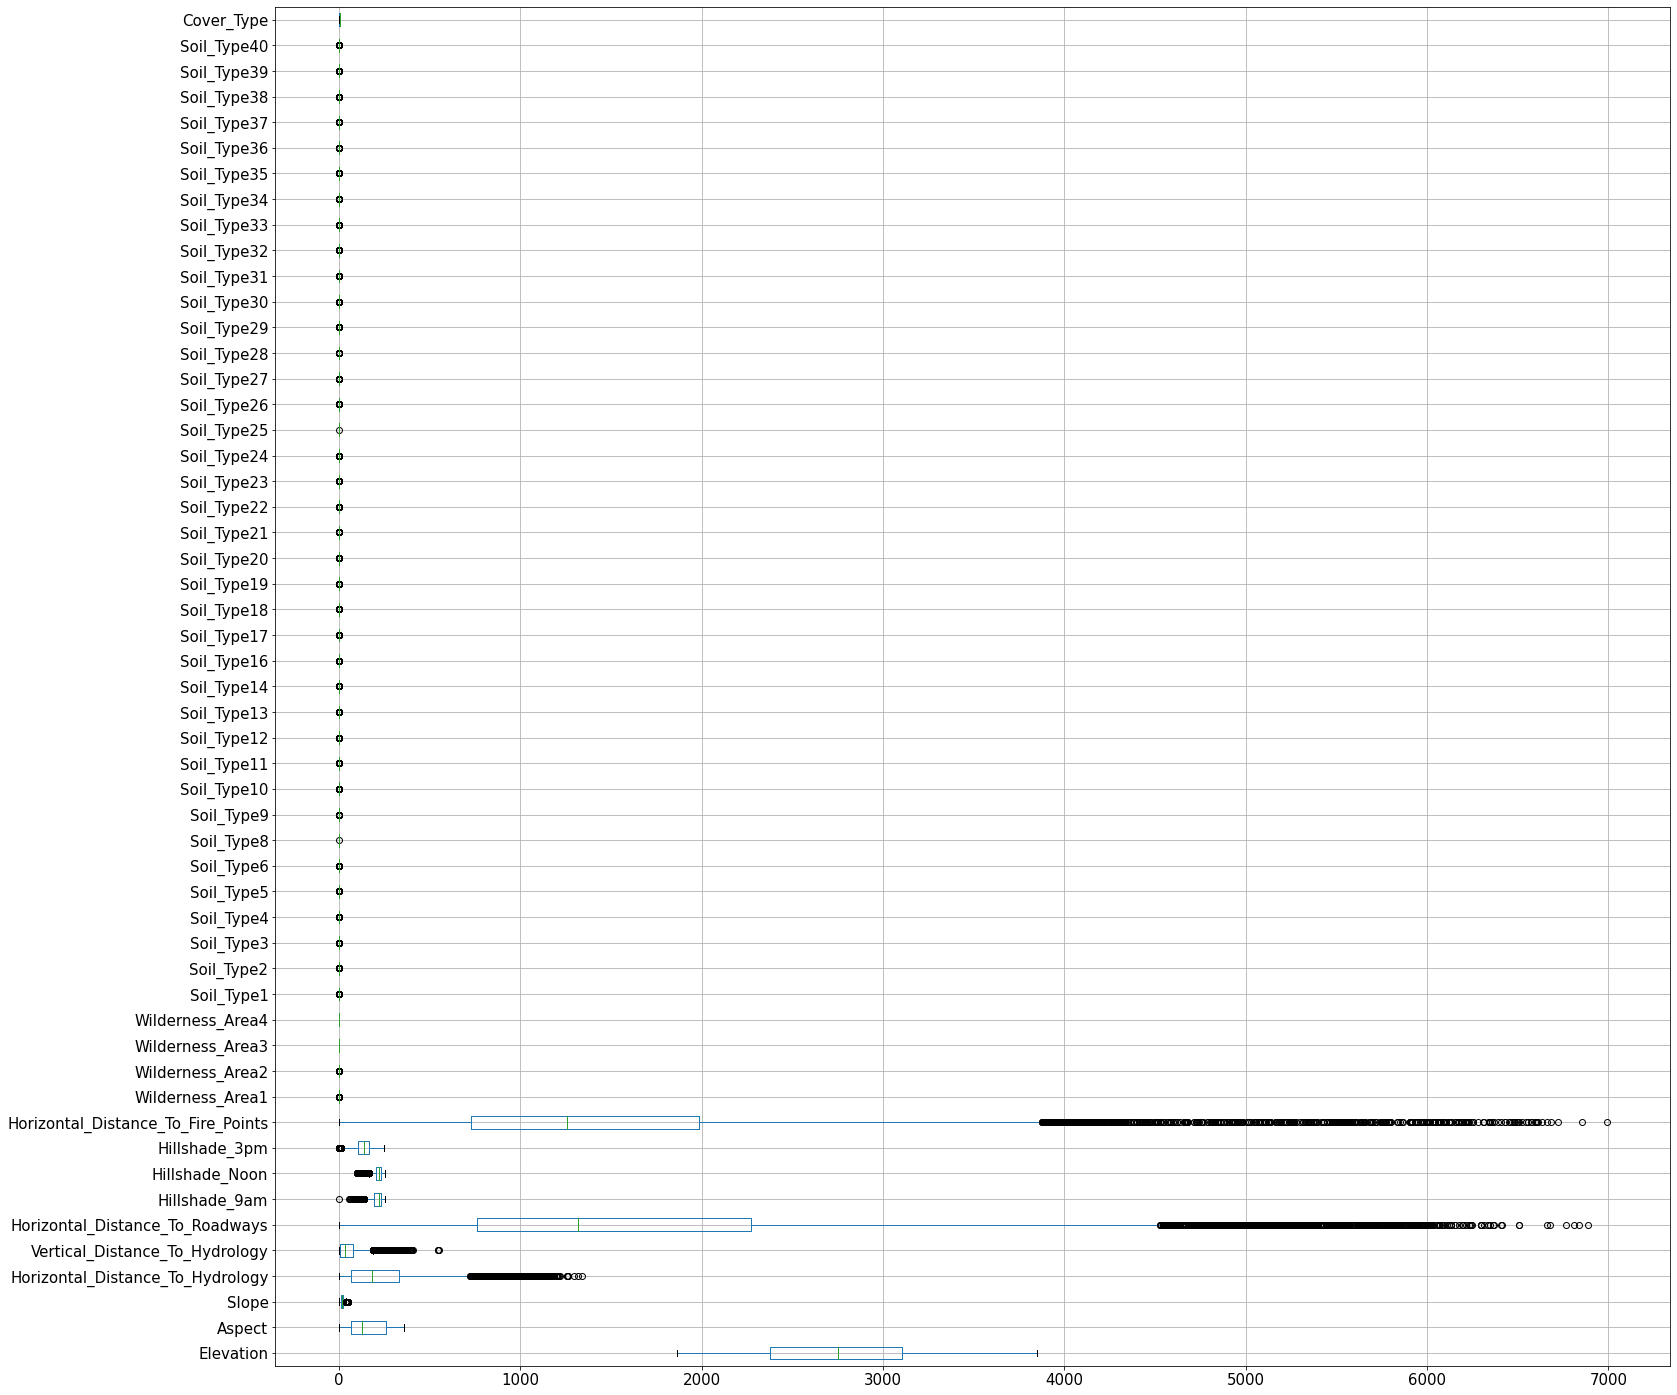

In [19]:
train.boxplot( fontsize=15, grid=True, figsize=(25,25),vert=False)

Here I will focus on the features that have larger values such as the distance features and check the nature of their outliers. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in the data, so I will remove the rows where there are outliers in distance columns. I chose to remove the rows where Horizontal_Distance_To_Fire_Points have outliers because this is the column which has the largest number of outliers and its outliers are also overlapping with that in the Horizontal_Distance_To_Roadways column.

In [20]:

Q1 = train['Horizontal_Distance_To_Fire_Points'].quantile(0.25)
Q3 = train['Horizontal_Distance_To_Fire_Points'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 



train.drop(train[(train['Horizontal_Distance_To_Fire_Points'] >= Q1 - 1.5 * IQR) & (train['Horizontal_Distance_To_Fire_Points'] <= Q3 + 1.5 *IQR)].index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,3153,52,12,150,11,1233,226,215,121,4833,...,0,0,0,0,0,0,0,0,0,1
14859,3308,23,13,309,17,1694,212,213,135,4943,...,0,0,0,0,0,0,0,0,0,1
14865,3319,50,17,551,28,1461,226,200,102,5109,...,0,0,0,0,0,0,0,0,0,1


# Feature Engineering

Now I will add some extra features that combine several of the existing features and the next step would be to determine whether this new feature is reasonable enough that it could be replace the features that it was created from.

In [21]:
train.head()
## ( addition and subtraction)
train['HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])
train['Neg_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])

train['HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])

train['HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

##(mean)
train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])/2

train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2

train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2

## mean of all three distances 
train['Mean_Fire_Hydrology_Roadways']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']) / 3

## mean of hillshade 
train['mean_hillshade'] = (train['Hillshade_9am']  + train['Hillshade_Noon']  + train['Hillshade_3pm'] ) / 3

train.head()
## ( addition and subtraction)
test['HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])
test['Neg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])

test['HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])

test['HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

##(mean)
test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])/2

test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2

test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2

## mean of all three distances 
test['Mean_Fire_Hydrology_Roadways']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways']) / 3

test['mean_hillshade'] = (test['Hillshade_9am']  + test['Hillshade_Noon']  + test['Hillshade_3pm'] ) / 3

Note that in the code above I have not mentioned Vertical_Distance_To_Hydrology because I used Horizontal_Distance_To_Hydrology which is highly correlated with it and so I will drop it.

The three most popular tools used by data scientists are decision trees, random forest and gradient boosting. 
I tried Gradient Boosting first. Gradient boosting also combine decision trees, but unlike random forests, they start the combining process at the beginning, instead of at the end.

In [22]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X, y = make_classification(random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0,test_size=0.05,)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(X_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test, y_test) * 100))



Accuracy of classifier on training set: 100.00
Accuracy of classifier on test set: 80.00


The result of the gradient boosting algorithm can be further enhanced if we tuned the parameters more.